### Imports

In [1]:
import sys
import os
import os.path

import numpy as np
import skimage.io
import glob

import shutil
#from config import config_vars

from tqdm import tqdm

import matplotlib.pyplot as plt
import skimage.morphology

import tensorflow as tf
import keras

import utils.metrics
import utils.model_builder
from skimage.transform import resize
from skimage import measure
from skimage import filters

Using TensorFlow backend.


### Load images

In [2]:
filename = os.listdir('/home/jupyter/aitslab_images/norm_images')
image_names = [os.path.join('/home/jupyter/aitslab_images/norm_images', f) for f in filename]
image_names.remove('/home/jupyter/aitslab_images/norm_images/.ipynb_checkpoints')

In [4]:
imagebuffer = skimage.io.imread_collection(image_names)

images = imagebuffer.concatenate()
images2 = list()
for i in images:
    i = resize(i, (520, 696), mode='constant', preserve_range=True)
    images2.append(i)
images2 = np.asarray(images2)

In [34]:
im = images2[0]

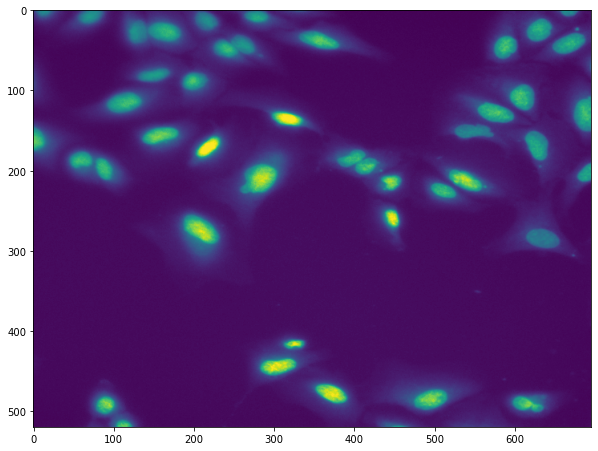

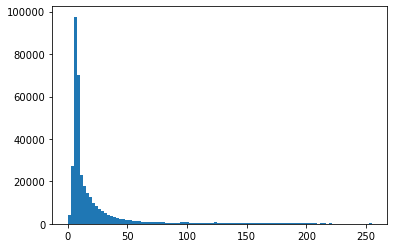

520 696


In [58]:
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()
plt.hist(im.flatten(), bins=100)
plt.show()
print(im.shape[0],im.shape[1])



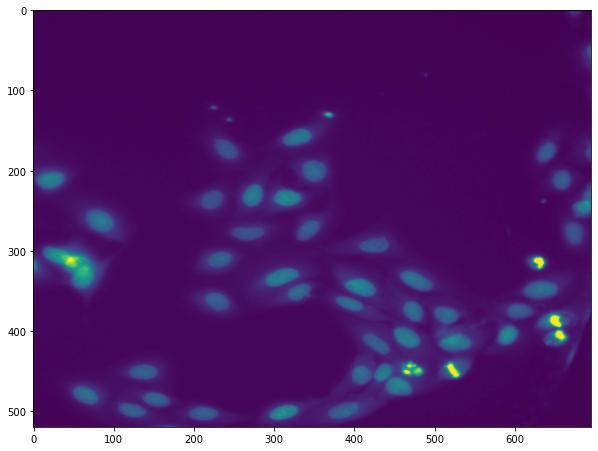

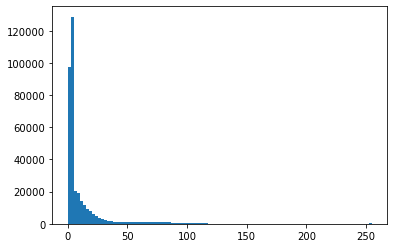

520 696


In [161]:
im2 = images2[7]
plt.figure(figsize=(10,10))
plt.imshow(im2)
plt.show()
plt.hist(im2.flatten(), bins=100)
plt.show()
print(im2.shape[0],im2.shape[1])

#### Thresholding using otsu's method & convert to annotation format:

In [166]:
filename = os.listdir('/home/jupyter/aitslab_images/norm_images')
filename.remove('.ipynb_checkpoints')

labels_dir = "/home/jupyter/aitslab_images/boundary_labels/"


for n,i in enumerate(images2):
    thresh_val = skimage.filters.threshold_otsu(i) #find threshold using otsus method
    mask = i > thresh_val # create mask 
    object_labels = skimage.measure.label(mask) # convert to skimage label
    annot = skimage.morphology.label(object_labels) # convert to annotation
    annot = skimage.morphology.remove_small_objects(annot, min_size=config_vars["min_nucleus_size"]) #unclear if necessary
    boundaries = skimage.segmentation.find_boundaries(annot) #extract boundaries
    
    for k in range(2, config_vars["boundary_size"], 2):
        boundaries = skimage.morphology.binary_dilation(boundaries)
    
    # prepare buffer for binary label
    label_binary = np.zeros((annot.shape + (3,)))

    # write binary label
    label_binary[(annot == 0) & (boundaries == 0), 0] = 1
    label_binary[(annot != 0) & (boundaries == 0), 1] = 1
    label_binary[boundaries == 1, 2] = 1
    
    # save it - converts image to range from 0 to 255
    skimage.io.imsave(labels_dir + filename[n], label_binary)
    
    

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

##### see example result

In [167]:
im = images2[7]
thresh_val = skimage.filters.threshold_otsu(im) #find threshold using otsus method
mask = im > thresh_val # create mask 
object_labels = skimage.measure.label(mask) # convert to skimage label
annot = skimage.morphology.label(object_labels) # convert to annotation
annot = skimage.morphology.remove_small_objects(annot, min_size=config_vars["min_nucleus_size"]) #unclear if necessary

label_binary = np.zeros((annot.shape + (3,)))

boundaries = skimage.segmentation.find_boundaries(annot) #extract boundaries

for k in range(2, config_vars["boundary_size"], 2):
    boundaries = skimage.morphology.binary_dilation(boundaries)
    

# write binary label
label_binary[(annot == 0) & (boundaries == 0), 0] = 1
label_binary[(annot != 0) & (boundaries == 0), 1] = 1
label_binary[boundaries == 1, 2] = 1

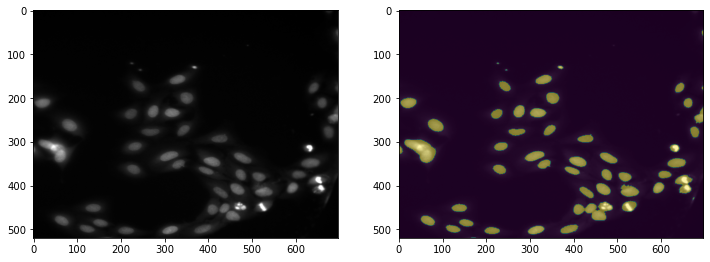

In [168]:
# Use the `cmap` kwarg to set the colourmap (only works for 2d arrays)
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(im, cmap="gray")
plt.subplot(122)
plt.imshow(im, cmap="gray")    
# `the_mask` will be overlaid on `im1` with 
# an opacity of 0.4 (maximum 1.0 = fully opaque). 
plt.imshow(mask, alpha=0.4) 

int64 (520, 696)


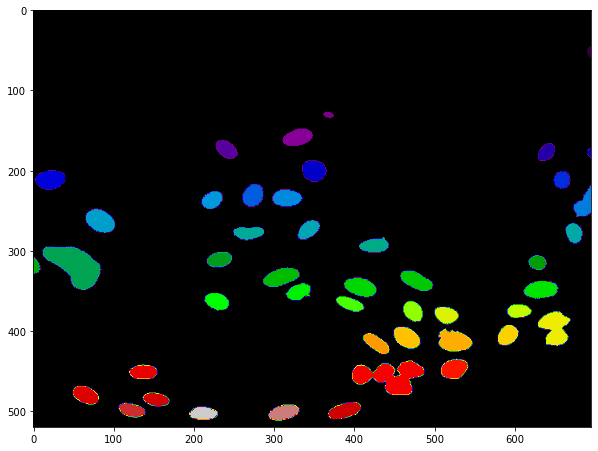

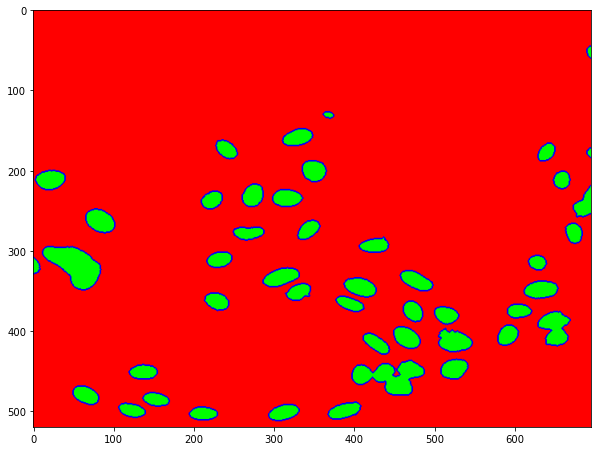

In [169]:
# Show example image 
print(annot.dtype, annot.shape)

# plot original annotation
plt.figure(figsize=(10,10))
plt.imshow(annot, cmap="nipy_spectral")
plt.show()

# plot boundary labels
plt.figure(figsize=(10,10))
plt.imshow(label_binary)
plt.show()

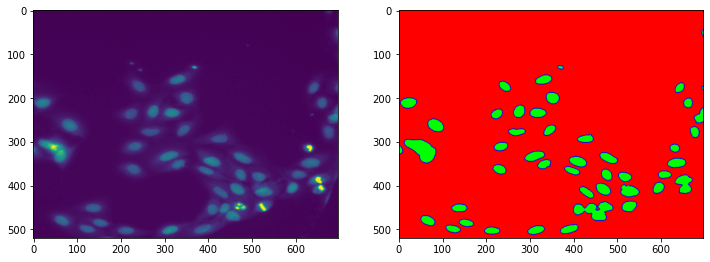

In [170]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(images2[7])
plt.subplot(122)
plt.imshow(label_binary)

> some segmentation problems for nuclei that are close together